# Aviation Accidents Data
This is a Phase 1 Project that involves a csv file on aviation accidents between the year 1948-2022

**Author:** Emma Kahoro 
**Date:** 29/09/2025  
**Purpose:** This notebook performs a detailed analysis of aviation accident data, including accident counts, injuries and relationships with weather, months and countries.


### Data Info
The data is obtained from github as the assigned dataset [AVIATION](https://github.com/learn-co-curriculum/dsc-phase-1-project-v3/blob/master/data/Aviation_Data.csv), which contains data on aviation accidents for different aircrafts and airports.

---
The dataset contains records of aviation accidents and incidents, including the following key variables:

- **Event.Date**: Date of the accident/incident  
- **Country**: Country where the event occurred  
- **Location**: Specific location of the event  
- **Weather.Condition**: Weather at the time of the event (VMC = Visual Meteorological Conditions, IMC = Instrument Meteorological Conditions, UNK = Unknown)  
- **Investigation.Type**: Type of investigation (Accident or Incident)  
- **Total.Fatal.Injuries**: Number of fatal injuries  
- **Total.Serious.Injuries**: Number of serious injuries  
- **Total.Minor.Injuries**: Number of minor injuries  

---

## Analysis Objectives
1. Explore the distribution of accidents and incidents by **country, month and weather condition**.  
2. Analyze the **relationship between injuries and factors** such as month, weather condition and investigation type.  
3. Identify **high-risk months and countries**.  
4. Examine whether accidents are more likely to be fatal under certain conditions.  
5. Summarize findings in tables and visualizations for **insights into aviation safety**.

---



### 1.1 **Import Libraries** and **Read Dataset**
- Load Python libraries for data manipulation and visualization.
- Load the CSV file containing accident and incident records.

In [154]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [155]:
# Read the dataset
df = pd.read_csv("Aviation_Data.csv", low_memory=False)

### 1.2 Inspect the data
Taking a look at the data to get a general sense of what the DataFrame is about.
Inspect the first few rows, check column types, and understand the dataset structure. 

In [156]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [157]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [158]:
print(df.shape)
print(df.columns)

(90348, 31)
Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### Summary of the Data
The general description from the df is;
- There are 90348 rows and 31 columns
- Columns have numerical and string data types
- There are missing values in most of the columns with only one column complete
- 4 columns are float datatype
- The data frame is messy and needs cleaning

### 2.0 **Data Cleaning and Transformation** 
Rectify the date datatype, handle missing values, remove duplicate values and create new columns (e.g., Year, Month).  

#### 2.1 Handling missing data and Duplicates

In [160]:
# See how many null values are in each column
df.isna().sum().sort_values()

# Event.Id has 1459 null values
# Drop rows where Event.Id is missing
df = df.dropna(subset=['Event.Id'])

# Check again
df.isna().sum().sort_values()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Amateur.Built               102
Country                     226
Injury.Severity            1000
Registration.Number        1317
Aircraft.damage            3194
Weather.Condition          4492
Total.Uninjured            5912
Number.of.Engines          6084
Purpose.of.flight          6192
Report.Status              6381
Engine.Type                7077
Total.Fatal.Injuries      11401
Total.Minor.Injuries      11933
Total.Serious.Injuries    12510
Publication.Date          15230
Broad.phase.of.flight     27165
Airport.Name              36099
Airport.Code              38640
Latitude                  54507
Longitude                 54516
Aircraft.Category         56602
FAR.Description           56866
Air.carrier               72241
Schedule                  76307
dtype: i

In [161]:
# Check for duplicates
df.duplicated().sum()

# The DataFrame has no Duplicates

0

#### 2.2 Cleaning the Weather Condition Column

In [162]:
df['Weather.Condition'].value_counts()

# There is UNK and Unk both for unknown
# make the categories case sensitive
df['Weather.Condition'] = df['Weather.Condition'].str.strip().str.upper()

df['Weather.Condition'].isnull().sum()

# Replace the missing values(4492) with UNK for Unknown
df['Weather.Condition'].fillna('UNK', inplace=True)
df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK     5610
Name: Weather.Condition, dtype: int64

#### 2.3 Changing the Event.Date column to date-time datatype

In [163]:
# Convert the columm data type do date.time 
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

print(df['Event.Date'].dtype)

# Extract Year and Month(Abbreviation) and observe if they correspond correctly
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.strftime('%b')

df[['Year', 'Month']].head()


datetime64[ns]


,Year,Month
0,1948,Oct
1,1962,Jul
2,1974,Aug
3,1977,Jun
4,1979,Aug


#### 2.4 Clean the Location Column and the Country Column
- Drop rows where both Country and Location are missing
- Ensure the the row items are case sensitive to remove duplicates
- Replace rows with missing Location and Country to `Unknown`

In [164]:
# Count rows where both Country and Location are missing
missing_both = df[df['Country'].isnull() & df['Location'].isnull()]
print("Number of rows missing both Country and Location:", missing_both.shape[0])

# Drop rows where BOTH Country and Location are missing(1 Row)
df = df.dropna(subset=['Country', 'Location'], how='all')


Number of rows missing both Country and Location: 1


In [165]:
# Cleaning the Location Column
df['Location'].value_counts()

# Strip extra spaces and standardize to Title
df['Location'] = df['Location'].str.title().str.strip()

# Rename the missing location as `Unknown`
df['Location'].fillna('Unknown', inplace=True)

df['Location'].isna().sum() # Check for missing data

# Separate the known from the unknown locations
df_known_location = df[df["Location"] != "Unknown"]

In [166]:
# Cleaning the Country Column
df['Country'].value_counts(dropna=False).head(20)

# Strip extra spaces and standardize capitalization 
df['Country'] = df['Country'].str.strip().str.title()

# # Fill missing country values with 'Unknown'
df['Country'].fillna('Unknown', inplace=True)

df['Country'].isna().sum() # Check for missing values

# # Separate the known from the unknown Country
df_known_country = df[df["Country"] != "Unknown"]

#### 2.5 Data Cleaning of the Numerical Columns
Columns of interest are; `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`
- Drop the rows with missing values in all the columns of interest
- Ensure that all the values are numeric in nature
- Fill the missing values with 0(which is the median and the approximate mean)
- Ensure that there are no negative injuries

In [167]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,82805.000000,77487.000000,76378.000000,76955.000000,82976.000000,88888.000000
mean,1.146585,0.647851,0.279884,0.357066,5.325504,1999.206710
std,0.446510,5.485995,1.544093,2.235639,27.913797,11.888284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2009.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000,2022.000000


In [168]:
# Count rows where 
missing_all = df[df['Total.Fatal.Injuries'].isnull() & 
                 df['Total.Serious.Injuries'].isnull() & 
                 df['Total.Minor.Injuries'].isnull() & 
                 df['Total.Uninjured'].isnull()]

print("Number of rows missing all injuries(Fatal,Serious,Minor,Uninjured):", missing_all.shape[0])

# Drop rows where all Injuries and Uninjured are missing(223 Rows)
df = df.dropna(subset=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'], how='all')


Number of rows missing all injuries(Fatal,Serious,Minor,Uninjured): 223


In [169]:
# # A list of the columns of interest
numeric_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# #  Convert to numeric (invalid entries become NaN)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])

# # Fill missing values with 0 (The Median and Approximate Mean)
df[numeric_cols] = df[numeric_cols].fillna(0)

# # Check for negative values in the columns
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
print(f"Number of rows with negative values: {neg_count}")

Number of rows with negative values: 0


In [170]:
# Check data type and missing data for all variables of interest
df[[
    'Country', 'Location', 'Weather.Condition', 'Event.Date',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'
    ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88665 entries, 0 to 90347
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 88665 non-null  object        
 1   Location                88665 non-null  object        
 2   Weather.Condition       88665 non-null  object        
 3   Event.Date              88665 non-null  datetime64[ns]
 4   Total.Fatal.Injuries    88665 non-null  float64       
 5   Total.Serious.Injuries  88665 non-null  float64       
 6   Total.Minor.Injuries    88665 non-null  float64       
 7   Total.Uninjured         88665 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 6.1+ MB


In [171]:
# Save cleaned DataFrame to a new CSV
## I will put it in .gitignore
df.to_csv('Aviation_Data_Cleaned.csv', index=False)


### 3.0 **Data Manipulation, Analysis and Visualization**


#### 3.1 Country Analysis
- Top 10 Countries with highest event occurence
- Distribution of Injuries in the top 10 countries
- Distribution of Event.Type in the top 10 countries

In [172]:
# Top 10 countries with the most events
top_10_countries= df[df['Country'] != 'Unknown']['Country'].value_counts().head(10)
top_10_countries

United States     82228
Brazil              368
Mexico              355
Canada              354
United Kingdom      329
Australia           277
Spain               225
France              222
Bahamas             213
Germany             207
Name: Country, dtype: int64

In [173]:
# Filter data to only those countries
df_top10 = df[df['Country'].isin(top_10_countries.index)]
df_top10

# Group by country and sum
injuries_top10 = (
    df_top10.groupby('Country')[['Total.Fatal.Injuries',
                                 'Total.Serious.Injuries',
                                 'Total.Minor.Injuries']]
    .sum()
    .reset_index()
)
# Add total column
injuries_top10['Total'] = (
    injuries_top10['Total.Fatal.Injuries'] + 
    injuries_top10['Total.Serious.Injuries'] + 
    injuries_top10['Total.Minor.Injuries']
)
# Sort by Total injuries (descending)
injuries_top10 = injuries_top10.sort_values(by='Total', ascending=False).reset_index(drop=True)

injuries_top10

,Country,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total
0,United States,30190.0,18227.0,23814.0,72231.0
1,Canada,946.0,150.0,514.0,1610.0
2,Brazil,1243.0,124.0,77.0,1444.0
3,France,813.0,52.0,53.0,918.0
4,Mexico,653.0,133.0,120.0,906.0
5,Spain,375.0,128.0,168.0,671.0
6,United Kingdom,467.0,34.0,42.0,543.0
7,Australia,284.0,58.0,53.0,395.0
8,Germany,327.0,34.0,26.0,387.0
9,Bahamas,191.0,69.0,88.0,348.0


In [174]:
# Group by Country + Investigation.Type
investigation_top10 = (
    df_top10.groupby(['Country', 'Investigation.Type'])
    .size()
    .reset_index(name='Count')
)

# Pivot for easier comparison
investigation_pivot = investigation_top10.pivot_table(
    index='Country',
    columns='Investigation.Type',
    values='Count',
    fill_value=0
)

# Remove the columns' index name
investigation_pivot.columns.name = None

# Sort by Accident counts
investigation_pivot = investigation_pivot.sort_values(by='Accident', ascending=False)

investigation_pivot

,Accident,Incident
Country,,
United States,79891,2337
Brazil,328,40
Canada,311,43
Mexico,290,65
United Kingdom,219,110
Australia,199,78
Bahamas,198,15
France,175,47
Spain,170,55


Summary:
US, Canada and Brazil have the highest number of events and the most injuries occuring in the DataFrame.

#### 3.2 Time Trends
-  Aggregate the number of accidents per year to identify long-term trends. A line chart to show whether aviation accidents are increasing, decreasing or remaining stable over time.
-  Aggregate accidents by month of event to check for seasonality. Peaks or dips may indicate months with higher or lower accident frequency.
- Aggregate accidents by month of injury type to check for seasonality. Peaks or dips may indicate months with higher or lower injury frequency.
- Find the reason why a certain month has more events occuring.

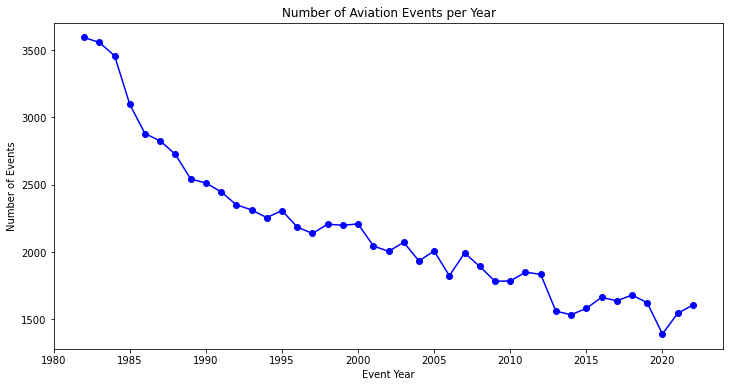

In [175]:
# A new variable that shows the Year and Number of Accidents in that Year
accidents_per_year = df.groupby('Year').size().reset_index(name='Event_Count')
accidents_per_year

# Because of the Outliers in the years 1984-1981, filter to start at 1982
accidents_filtered = accidents_per_year[accidents_per_year['Year'] >= 1982]

# PLot the line-graph to see the Trend
plt.figure(figsize=(12,6))
plt.plot(accidents_filtered['Year'], accidents_filtered['Event_Count'], color='blue', marker='o')
plt.title("Number of Aviation Events per Year")
plt.xlabel("Event Year")
plt.ylabel("Number of Events")
plt.show()

There is a significant decline in the occurence of events over the years though not quite smooth

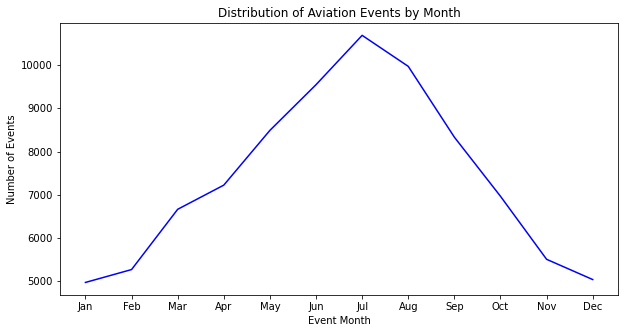

In [176]:
# Ensure the months in the graph are ordered for easy interpretation 

# The correct chronological order of the abbreviated months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical type with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

accidents_per_month = df.groupby('Month').size().reset_index(name='Event_Count')
accidents_per_month

# Plot the Line graph for Months against events
plt.figure(figsize=(10,5))
plt.plot(accidents_per_month['Month'], accidents_per_month['Event_Count'], color='blue')
plt.title("Distribution of Aviation Events by Month")
plt.xlabel("Event Month")
plt.ylabel("Number of Events")
plt.show()

July has the highest number of aviation accidents followed by August and June
January and December have the lowest accidents.
Mid year are the peak months when aviation accidents happen.

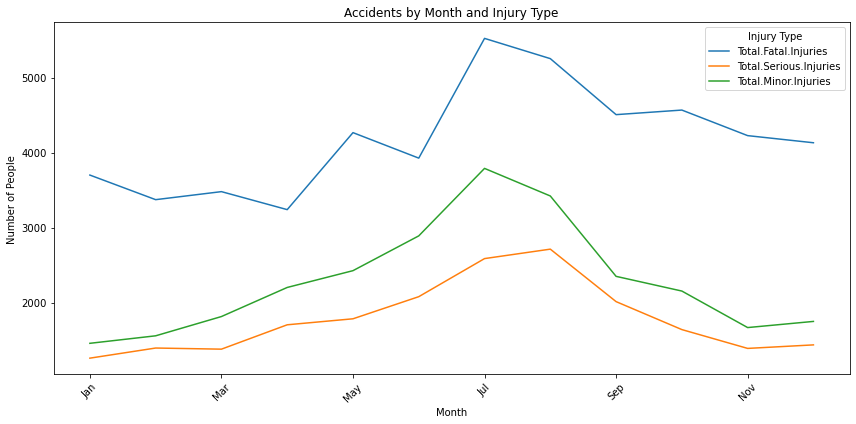

In [177]:
## Analyse the injuries, Fatal Severe and Minor over the months
# a variable containing the injuries
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']

# Group the months by the injury variables
injuries_per_month = df.groupby('Month')[injury_cols].sum().reset_index()
injuries_per_month = injuries_per_month.sort_values('Month')
injuries_per_month

#Plot of the trends of the injury types
injuries_per_month.plot(x='Month',  figsize=(12,6))
plt.title("Accidents by Month and Injury Type")
plt.xlabel("Month")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend(title="Injury Type")
plt.tight_layout()
plt.show()

Again, mid year the injuries are at peak compared to the beginning and the end of the year

#### 3.3 Distribution of the Weather Condition
- Analyse weather condition and the event count.
- Analyse weather condition and injury count.
- Is there a correlation between weather condition and month?

**Recall**:(VMC = Visual Meteorological Conditions, IMC = Instrument Meteorological Conditions, UNK = Unknown) 

In [182]:
# Create a contingency table: counts of events and Weather.Condition
accidents_by_weather = (
    df['Weather.Condition']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'Weather.Condition', 'Weather.Condition':'Event_Count'})
)
accidents_by_weather


,Weather.Condition,Event_Count
0,VMC,77259
1,IMC,5970
2,UNK,5436


  Weather.Condition  Total.Fatal.Injuries  Total.Serious.Injuries  \
2               VMC               25558.0                 17448.0   
1               UNK               12818.0                  1781.0   
0               IMC               11824.0                  2148.0   

   Total.Minor.Injuries  
2               22973.0  
1                1773.0  
0                2732.0  


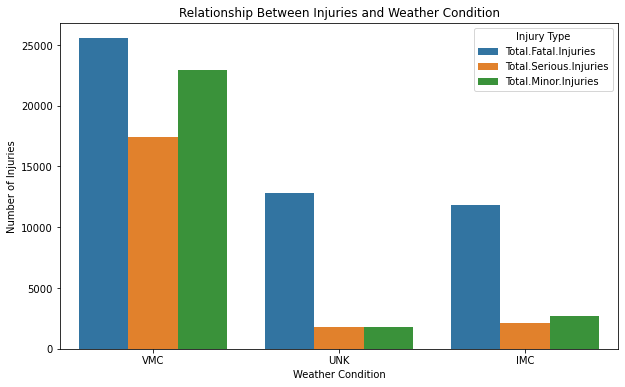

In [ ]:
# Create a contingency table: counts of injuries and Weather.Condition
injuries_by_weather = (df.groupby('Weather.Condition')[injury_cols].sum().reset_index())

injuries_by_weather = injuries_by_weather.sort_values(by='Total.Fatal.Injuries', ascending=False)
print (injuries_by_weather)

# Melt all the injuries data for plotting
injuries_melted = injuries_by_weather.melt(id_vars='Weather.Condition',
                                           value_vars=['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries'],
                                           var_name='Injury_Type',
                                           value_name='Count')
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=injuries_melted, x='Weather.Condition', y='Count', hue='Injury_Type')
plt.title('Relationship Between Injuries and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Injuries')
plt.legend(title='Injury Type')
plt.show()

**VMC** is consistently high meaning thet Visual Meteoroligical Conditions which is visual interpretation of the weather causes more accidents and injuries than when instruments are used. 

Weather.Condition  IMC  UNK   VMC
Month                            
Jan                694  378  3901
Feb                562  394  4315
Mar                580  448  5636
Apr                453  386  6384
May                358  436  7695
Jun                361  454  8730
Jul                324  573  9789
Aug                376  547  9046
Sep                411  533  7388
Oct                496  496  5973
Nov                607  388  4513
Dec                748  403  3889


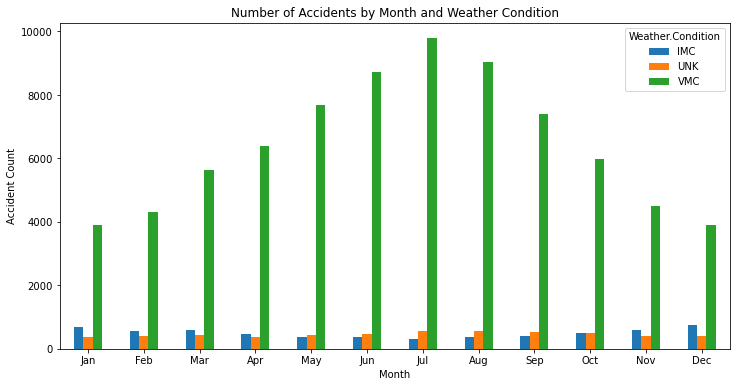

In [180]:
# Create a contingency table: counts of events by Month and Weather.Condition
month_weather_table = pd.crosstab(df['Month'], df['Weather.Condition'])
print(month_weather_table)

# Plot a grouped bar chart for month and weather condition
month_weather_table.plot(kind='bar', figsize=(12,6))
plt.title('Number of Accidents by Month and Weather Condition')
plt.ylabel('Accident Count')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()

It is evident that Visual Meteorological Conditions(VMC) were high mid year and low at the beginning and end of the year.
There was no significantly huge difference with the Instrument Meteorological Conditions(IMC) over the months.

In [181]:
# Group by Month and Weather.Condition
month_weather_counts = df.groupby(['Month', 'Weather.Condition']).size().unstack()
month_weather_counts 

 # Add total events per month
month_weather_counts['Total_Events'] = month_weather_counts.sum(axis=1)

# Check for correlation between Month and Weather.Condition
correlation = month_weather_counts['VMC'.strip()].corr(month_weather_counts['Total_Events'])
print(f"Correlation between VMC and total events per month: {correlation:.2f}")

Correlation between VMC and total events per month: 1.00


Any month there was an increase in VMC, the event also increased, there is a **positive relationship** but doesn't explain the **causation**.